# Analyzing Online News Popularity Data
### *Author: Brett Dale*

# Table of contents
1. [Introduction](#introduction)
2. [Goal](#goal)
3. [Plotting and Analyzing the Data](#plotting)

## Introduction <a name="introduction"></a>

The Online News Popularity data set captures statistics from articles posted on Mashable's website (www.mashable.com)

The data set includes 61 features, with the features being things such as each article's published date, average length of words in the article, number of links used in article, etc.

I chose this data set because this one stuck out to me as the most interesting one to study.
The internet is a crucial part of today's society and manipulating data on online news articles seems like a relevant study.

## Goal <a name="goal"></a>

The target I am hoping to predict with this data set is the amount of shares an article received.

There are many different features that have been recorded and I plan to find a high correlation between one of these features and the shares articles receive.

## Plotting and Analyzing the Data <a name="plotting"></a>

In [67]:
import pandas as pd
news_df = pd.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv", dtype={'url': str, 'timedelta': float, 'n_tokens_content' : float}, sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

In [68]:
print(news_df.columns.tolist())

['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', '

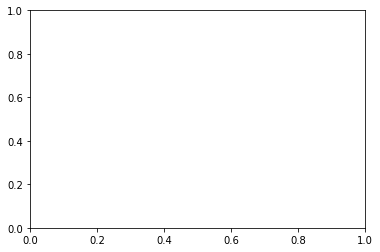

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.axes()

In [70]:
news_df['timedelta'] = pd.to_numeric(news_df['timedelta'])
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

## Analyzing the Data